## Observations and Insights 

In [122]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [123]:
# Checking the number of mice.
number_of_mice = len(merge_mouse_data["Mouse ID"].unique())
number_of_mice 

249

In [124]:
len(merge_mouse_data)

1893

In [125]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_by_time = merge_mouse_data.groupby(["Mouse ID", "Timepoint"]).head()
mouse_by_timepoint_df = mouse_by_time.set_index(["Mouse ID", "Timepoint"])
mouse_by_timepoint_df
# = pd.DataFrame(mouse_by_timepoint)
# duplicate_mice = merge_mouse_data["Mouse ID"].value_counts()
# duplicate_mice


Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_by_timepoint_df

Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   
...                         ...   ...         ...         ...   
z969     25            Naftisol  Male           9          30   
         30            Naftisol  Male           9          30   
         35            Naftisol  Male           9          30   
         40            Naftisol  Male           9          30   
         45            Naftisol  Male           9          30   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1  
...                                ...               ...  
z969     25                  63.145652                 2  
         30                  65.841013                 3  
         35                  69.176246                 4  
         40                  70.314904                 4  
         45                  73.867845                 4  

[1893 rows x 6 columns]

In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_mouse_data.drop_duplicates(subset ="Mouse ID", keep="last")
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [128]:
# Checking the number of mice in the clean DataFrame.        
len(clean_mouse_df)

249

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = clean_mouse_df.groupby("Drug Regimen")

drug_group_summary = drug_group["Tumor Volume (mm3)"].describe()
# This method produces everything in a single groupby function


drug_group_summary["variance"] = drug_group["Tumor Volume (mm3)"].var()
drug_group_summary["sem"] = drug_group["Tumor Volume (mm3)"].sem()

drug_group_df = drug_group_summary.reset_index()
drug_group_df


,Drug Regimen,count,mean,std,min,25%,50%,75%,max,variance,sem
0,Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963,32.663378,1.143038
1,Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185,69.982735,1.673114
2,Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731,74.010875,1.720591
3,Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014,98.921330,1.989184
4,Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817,106.029927,2.059417
5,Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939,78.759797,1.774934
6,Propriva,25.0,56.736964,8.327605,45.000000,49.122969,55.841410,62.570880,72.455421,69.349002,1.665521
7,Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869,32.166354,1.134308
8,Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690,90.331586,1.940056
9,Zoniferol,25.0,59.181258,8.767099,45.000000,49.988302,61.840058,66.794156,73.324432,76.862027,1.753420


## Bar and Pie Charts

In [131]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Dataframe.plot()
drug_group.plot(x="Drug Regimen", y="count", kind='bar', title="Total Number of Mice for Each Treatment")



KeyError: 'count'

([<matplotlib.axis.XTick at 0x7ff644c98880>,
 [Text(0, 0, "('Capomulin', 19      Capomulin\n29      Capomulin\n39      Capomulin\n64      Capomulin\n104     Capomulin\n124     Capomulin\n134     Capomulin\n144     Capomulin\n164     Capomulin\n204     Capomulin\n224     Capomulin\n244     Capomulin\n282     Capomulin\n299     Capomulin\n309     Capomulin\n317     Capomulin\n337     Capomulin\n340     Capomulin\n350     Capomulin\n360     Capomulin\n370     Capomulin\n380     Capomulin\n390     Capomulin\n440     Capomulin\n1455    Capomulin\nName: Drug Regimen, dtype: object)"),
  Text(0, 0, "('Ceftamin', 493     Ceftamin\n594     Ceftamin\n600     Ceftamin\n617     Ceftamin\n840     Ceftamin\n940     Ceftamin\n993     Ceftamin\n1033    Ceftamin\n1112    Ceftamin\n1119    Ceftamin\n1122    Ceftamin\n1132    Ceftamin\n1162    Ceftamin\n1260    Ceftamin\n1379    Ceftamin\n1406    Ceftamin\n1551    Ceftamin\n1582    Ceftamin\n1583    Ceftamin\n1670    Ceftamin\n1743    Ceftamin\n1773    C

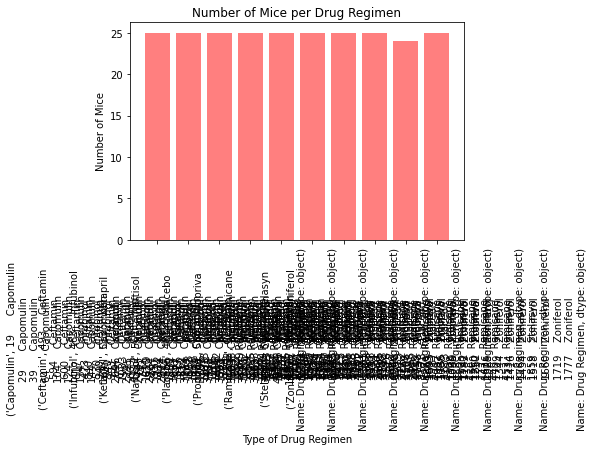

In [132]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# drugs = list(clean_mouse_df["Drug Regimen"].unique())
# x_axis = np.arange(len(drugs))
# y_axis = list(drug_group_summary["count"])

drugs = list(drug_group["Drug Regimen"])
x_axis = np.arange(len(drugs))
y_axis = list(drug_group_summary["count"])


plt.bar(x_axis, y_axis, color="r", alpha=.5, align= "center")
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Type of Drug Regimen")

tick_locations = [drug for drug in x_axis]
plt.xticks(tick_locations, drugs, rotation="vertical")



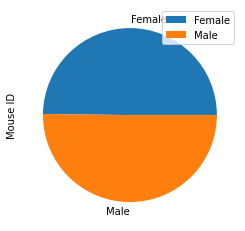

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_by_sex = clean_mouse_df.groupby("Sex")
m = mouse_by_sex.count()
m.plot(x="Sex", y="Mouse ID", kind="pie")

([<matplotlib.patches.Wedge at 0x7ff644ea10a0>,
 [Text(-0.765530819348709, 0.9241009493704108, 'Female'),
  Text(0.7017365844029828, -0.8470925369228769, 'Male')],
 [Text(-0.44655964462008024, 0.5390588871327395, '49.8%'),
  Text(0.3827654096743542, -0.46205047468520555, '50.2%')])

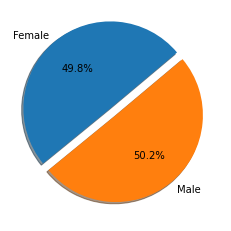

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = list(mouse_by_sex["Mouse ID"].count())
explode = (.1,0)
plt.pie(count, explode = explode, labels=labels, shadow=True, autopct ="%1.1f%%",startangle = 40)


## Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Get individual data frames Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_data = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin")]
ramicane_data = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Ramicane")]
infubinol_data = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Infubinol")]
ceftamin_data = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Ceftamin")]
#Merge all four Regimens into one DataFrame
merged_data_1 = pd.merge(capomulin_data,ramicane_data, on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"], how="outer")
merged_data_2 = pd.merge(infubinol_data,ceftamin_data, on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"], how="outer")
merged_data_3 = pd.merge(merged_data_1,merged_data_2, on=["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"], how="outer")
merged_data_3
# drug_group_regimen = new_group_by_drug.set_index("Drug Regimen")
# new_group_by_drug.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"]]

# tumor_vol_each_mouse = new_group_by_drug.head()
# tumor_vol_each_mouse


#[["Mouse ID", "Tumor Volume (mm3)"]]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
95,x226,Ceftamin,Male,23,28,0,45.000000,0
96,x581,Ceftamin,Female,19,28,45,64.634949,3
97,x822,Ceftamin,Male,3,29,45,61.386660,3
98,y769,Ceftamin,Female,6,27,45,68.594745,4


In [116]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#filter data to show mice treated with capomulin
mouse_by_capomulin = merge_mouse_data.loc[merge_mouse_data["Drug Regimen"] == "Capomulin"]
#choose a mouse ----> prefer to pick s185
#show all of mouse s185 data
s_one_eight_five_df = merge_mouse_data.loc[merge_mouse_data["Mouse ID"] == "s185"]
s_one_eight_five_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


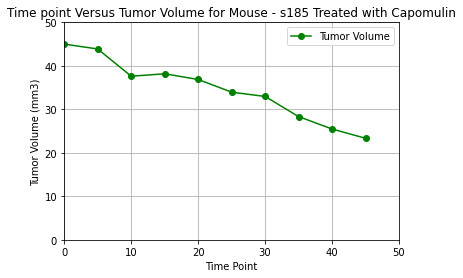

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#x_axis = np.arange(0,46,5)
x_axis = s_one_eight_five_df["Timepoint"]
y_axis = s_one_eight_five_df["Tumor Volume (mm3)"]
#         # list(s_one_eight_five_df["Tumor Volume (mm3)"])
s_one_eight_five_line = plt.plot(x_axis, y_axis, marker="o", color="green", label="Tumor Volume")
plt.title("Time point Versus Tumor Volume for Mouse - s185 Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid()
plt.legend(handles=s_one_eight_five_line,loc="best")
plt.show()



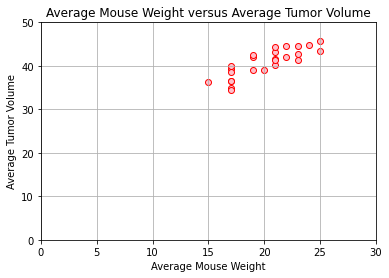

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
per_mouse = mouse_by_capomulin.groupby("Mouse ID")

avg_tumor_vol = per_mouse["Tumor Volume (mm3)"].mean()
avg_weight = per_mouse["Weight (g)"].mean()

# max_weight = avg_tumor_vol.max()
# max_tumor = avg_weight.max()

# x_axis = np.arange(0, y_limit, 1)
# y_axis = np.arange(0, x_limit, 1)

plt.scatter(avg_weight, avg_tumor_vol, marker="o", facecolors="pink", edgecolors="red")
plt.title("Average Mouse Weight versus Average Tumor Volume")
plt.ylabel("Average Tumor Volume")
plt.xlabel("Average Mouse Weight")

plt.xlim(0,30)
plt.ylim(0,50)
plt.grid()      

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient

correlation = np.corrcoef(avg_tumor_vol, avg_weight, rowvar=True)
corr_coef = correlation[0][1]
corr_coef

0.8419363424694717

In [38]:
# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(avg_weight, avg_tumor_vol)
linear_regression = ('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))
# for mouse weight and average tumor volume for the Capomulin regimen
linear_regression

'y = 0.95x + 21.55'

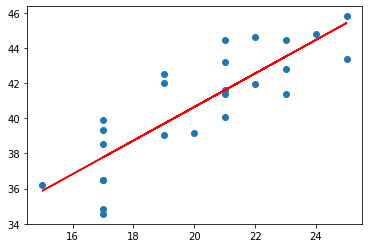

In [39]:
regress_values = avg_weight * slope + intercept
plt.scatter(avg_weight, avg_tumor_vol)
plt.plot(avg_weight, regress_values, "r-")